# Python good practices

## Environment setup

In [1]:
!pip install papermill

In [2]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import os
import papermill as pm

from IPython.display import YouTubeVideo

Python version: 3.7.5


## Writing pythonic code

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### What does "Pythonic" mean?

- Python code is considered _pythonic_ if it:
  - conforms to the Python philosophy;
  - takes advantage of the language's specific features.
- Pythonic code is nothing more than **idiomatic Python code** that strives to be clean, concise and readable.

### Example: swapping two variables

In [4]:
a = 3
b = 2

# Non-pythonic
tmp = a
a = b
b = tmp

# Pythonic
a, b = b, a

### Example: iterating on a list

In [5]:
my_list = ["a", "b", "c"]


def do_something(item):
    # print(item)
    pass


# Non-pythonic
i = 0
while i < len(my_list):
    do_something(my_list[i])
    i += 1

# Still non-pythonic
for i in range(len(my_list)):
    do_something(my_list[i])

# Pythonic
for item in my_list:
    do_something(item)

### Example: indexed traversal

In [6]:
my_list = ["a", "b", "c"]

# Non-pythonic
for i in range(len(my_list)):
    print(i, "->", my_list[i])

# Pythonic
for i, item in enumerate(my_list):
    print(i, "->", item)

0 -> a
1 -> b
2 -> c
0 -> a
1 -> b
2 -> c


### Example: searching in a list

In [7]:
fruits = ["apples", "oranges", "bananas", "grapes"]
fruit = "cherries"

# Non-pythonic
found = False
size = len(fruits)
for i in range(0, size):
    if fruits[i] == fruit:
        found = True

# Pythonic
found = fruit in fruits

### Example: generating a list

This feature is called [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).

In [8]:
numbers = [1, 2, 3, 4, 5, 6]

# Non-pythonic
doubles = []
for i in range(len(numbers)):
    if numbers[i] % 2 == 0:
        doubles.append(numbers[i] * 2)
    else:
        doubles.append(numbers[i])

# Pythonic
doubles = [x * 2 if x % 2 == 0 else x for x in numbers]

### Code style

- [PEP8](https://www.python.org/dev/peps/pep-0008/) is the official style guide for Python:
  - use 4 spaces for indetation;
  - define a maximum value for line length (around 80 characters);
  - organize imports at beginning of file;
  - surround binary operators with a single space on each side;
  - ...
- Code style should be enforced upon creation by a tool like [black](https://github.com/psf/black).

### Beyond PEP8

Focusing on style and PEP8-compliance might make you miss more fundamental code imperfections.

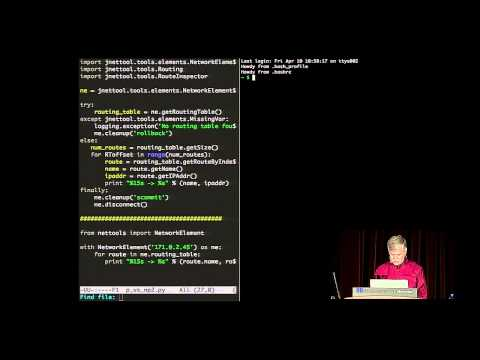

In [9]:
YouTubeVideo("wf-BqAjZb8M")

### Docstrings

A [docstring](https://www.python.org/dev/peps/pep-0257/) is a string literal that occurs as the first statement in a module, function, class, or method definition to document it.

All modules, classes, public methods and exported functions should include a docstring.

In [10]:
def complex(real=0.0, imag=0.0):
    """Form a complex number.

    Keyword arguments:
    real -- the real part (default 0.0)
    imag -- the imaginary part (default 0.0)
    """
    if imag == 0.0 and real == 0.0:
        return complex_zero

### Code linting

- _Linting_ is the process of checking code for syntactical and stylistic problems before execution.
- It is useful to catch errors and improve code quality in dynamically typed, interpreted languages, where there is no compiler.
- Several linters exist in the Python ecosystem. The most commonly used is [pylint](https://pylint.org/).

### Type annotations

- Added in Python 3.5, [type annotations](https://www.python.org/dev/peps/pep-0484/) allow to add type hints to code entities like variables or functions, bringing a statically typed flavour to the language.
- [mypy](http://mypy-lang.org/) can automatically check the code for annotation correctness.

In [11]:
def greeting(name: str) -> str:
    return "Hello " + name


# greeting('Alice')  # OK
# greeting(3)  # mypy error: incompatible type "int"; expected "str"

### Unit tests

Unit tests automate the testing of individual code elements like functions or methods, thus decreasing the risk of bugs and regressions.

They can be implemented in Python using tools like [unittest](https://docs.python.org/3/library/unittest.html) or [pytest](https://docs.pytest.org).

In [12]:
def inc(x):
    return x + 1


def test_answer():
    assert inc(3) == 5  # AssertionError: assert 4 == 5

## Packaging and dependency management

### Managing dependencies in Python

- Most Python apps depend on third-party libraries and frameworks (NumPy, Flask, Requests...).
- These tools may also have external dependencies, and so on.
- **Dependency management** is necessary to prevent version conflicts and incompatibilities. it involves two things:
  - a way for the app to declare its dependencies;
  - a tool to resolve these dependencies and install compatible versions.

### Semantic versioning

- Software versioning convention used in many ecosystems.
- A version number comes as a suite of three digits `X.Y.Z`.
  - X = major version (potentially including breaking changes).
  - Y = minor version (only non-breaking changes).
  - Z = patch.
- Digits are incremented as new versions are shipped.

### pip and requirements.txt

A `requirements.txt` file is the most basic way of declaring dependencies in Python.

```text
certifi>=2020.11.0
chardet==4.0.0
click>=6.5.0, <7.1
download==0.3.5
Flask>=1.1.0
```

The [pip](https://pypi.org/project/pip/) package installer can read this file and act accordingly, downloading dependencies from [PyPI](https://pypi.org/).

```bash
pip install -r requirements.txt
```

### Virtual environments

- A **virtual environment** is an isolated Python environment where a project's dependencies are installed.
- Using them prevents the risk of mixing dependencies required by different projects on the same machine.
- Several tools exist to manage virtual environments in Python, for example [virtualenv](https://virtualenv.pypa.io) and [conda](https://docs.conda.io).

### conda and environment.yml

Installed as part of the [Anaconda](https://www.anaconda.com/) distribution, the [conda](https://docs.conda.io) package manager reads an `environment.yml` file to install the dependencies associated to a specific virtual environment.

```yaml
name: example-env

channels:
  - conda-forge
  - defaults

dependencies:
  - python=3.7
  - matplotlib
  - numpy
```

### Poetry

[Poetry](https://python-poetry.org) is a recent packaging and dependency management tool for Python. It downloads packages from [PyPI](https://pypi.org/) by default.

```bash
# Create a new poetry-compliant project
poetry new <project name>

# Initialize an already existing project for Poetry
poetry init

# Install defined dependencies
poetry install

# Add a package to project dependencies and install it
poetry add <package name>

# Update dependencies to sync them with configuration file
poetry update
```

### Poetry and virtual environments

By default, Poetry creates a virtual environment for the configured project in a user-specific folder. A standard practice is to store it in the project's folder.

```bash
# Tell Poetry to store the environment in the local project folder
poetry config virtualenvs.in-project true

# Activate the environment
poetry shell
```

### The pyproject.toml file

Poetry configuration file, soon-to-be standard for Python projects.

```toml
[tool.poetry]
name = "poetry example"
version = "0.1.0"
description = ""

[tool.poetry.dependencies]
python = ">=3.7.1,<3.10"
jupyter = "^1.0.0"
matplotlib = "^3.3.2"
sklearn = "^0.0"
pandas = "^1.1.3"
ipython = "^7.0.0"

[tool.poetry.dev-dependencies]
pytest = "^6.1.1"
```

### Caret requirements

Offers a way to precisely define dependency versions.

| Requirement | Versions allowed |
| :---------: | :--------------: |
|   ^1.2.3    |  >=1.2.3 <2.0.0  |
|    ^1.2     |  >=1.2.0 <2.0.0  |
|   ~1.2.3    |  >=1.2.3 <1.3.0  |
|    ~1.2     |  >=1.2.0 <1.3.0  |
|    1.2.3    |    1.2.3 only    |

### The poetry.lock file

- The first time Poetry install dependencies, it creates a `poetry.lock` file that contains the exact versions of all installed packages.
- Subsequent installs will use these exact versions to ensure consistency.
- Removing this file and running another Poetry install will fetch the latest matching versions.

## Working with notebooks

### Advantages of Jupyter notebooks

- Standard format for mixing text, images and (executable) code.
- Open source and platform-independant.
- Useful for experimenting and prototyping.
- Growing ecosystem of [extensions](https://tljh.jupyter.org/en/latest/howto/admin/enable-extensions.html) for various purposes and cloud hosting solutions ([Colaboratory](https://colab.research.google.com/), [AI notebooks](https://www.ovhcloud.com/en/public-cloud/ai-notebook/)...).
- Integration with tools like [Visual Studio Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks).

### Drawbacks of Jupyter notebooks

- Arbitrary execution order of cells can cause confusing errors.
- Notebooks don't encourage good programming habits like modularization, linting and tests.
- Being JSON-based, their versioning is more difficult than for plain text files.
- Dependency management is also difficult, thus hindering reproducibility.

### Collaborating with notebooks

A common solution for sharing notebooks between a team is to use [Jupytext](https://jupytext.readthedocs.io). This tool can associate an `.ipynb` file with a Python file to facilitate collaboration and version control.

[![Collaboration example through Jupytext](images/JupyterPyCharm.gif)](https://jupytext.readthedocs.io/en/latest/examples.html)

### Code organization

Monolithic notebooks can grow over time and become hard to understand and maintain.

Just like in a traditional software project, it is possible to split them into separate parts, thus following the [separation of concerns](https://en.wikipedia.org/wiki/Separation_of_concerns) design principle.

Code can be splitted into several sub-notebooks and/or external Python files. The latter facilitates unit testing and version control.

### Notebook workflow

Tools like [papermill](https://papermill.readthedocs.io) can orchestrate the execution of several notebooks in a row. External parameters can be passed to notebooks, and the runtime flow can depend on the execution results of each notebook.

In [13]:
notebook_dir = "./papermill"
result = pm.execute_notebook(
    os.path.join(notebook_dir, "simple_input.ipynb"),
    os.path.join(notebook_dir, "simple_output.ipynb"),
    parameters={"msg": "Hello"},
)